###### Problem Statement:
- HRWorks supports several information technology (IT) companies in India with their talent acquisition. One of the challenges they face is about 30% of the candidates who accept the jobs offer do not join the company. This leads to huge loss of revenue and time as the companies initiate the recruitment process again to fill the workforce demand. HRWorks wants to find if a model can be built to predict the likelihood of a candidate joining the company.

#### Explanation :
- Negligence to join a company from the candidate side can cause a serious issue, considerig the fact that the company will have to go through the same process of hiring from beginning which leads to considerable loss in revenuue and time.From the data presented by the company, we can see that the major functions which explains the basic context of candidate mindset is 'years of experience' and 'Percent difference CTC'. The rest relationships can be later analysed. 

- H0: The candidates would accept the job offer 
- H1: The candidate reject the job offer. 

# Exploratory Data Analysis 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\aaron\\Data Science\\1.Files\\assn.csv')
df.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34.0,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34.0,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27.0,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34.0,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34.0,Joined


In [3]:
df.shape

(8995, 18)

In [4]:
df['Status'].value_counts()

Joined        7313
Not Joined    1682
Name: Status, dtype: int64

#### If we observe the data set is Imbalance

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8995 non-null   int64  
 1   Candidate Ref                8995 non-null   int64  
 2   DOJ Extended                 8995 non-null   object 
 3   Duration to accept offer     8995 non-null   int64  
 4   Notice period                8995 non-null   int64  
 5   Offered band                 8982 non-null   object 
 6   Pecent hike expected in CTC  8995 non-null   float64
 7   Percent hike offered in CTC  8995 non-null   float64
 8   Percent difference CTC       8995 non-null   float64
 9   Joining Bonus                8995 non-null   object 
 10  Candidate relocate actual    8995 non-null   object 
 11  Gender                       8995 non-null   object 
 12  Candidate Source             8995 non-null   object 
 13  Rex in Yrs        

In [6]:
df.isna().sum()

SLNO                            0
Candidate Ref                   0
DOJ Extended                    0
Duration to accept offer        0
Notice period                   0
Offered band                   13
Pecent hike expected in CTC     0
Percent hike offered in CTC     0
Percent difference CTC          0
Joining Bonus                   0
Candidate relocate actual       0
Gender                          0
Candidate Source                0
Rex in Yrs                      0
LOB                             0
Location                        0
Age                            15
Status                          0
dtype: int64

##### Considering GENDER as a  factor for filling the AGE groups:

In [7]:
df['Age'].fillna(df.groupby('Gender')['Age'].transform('mean'), inplace = True) 

In [8]:
df['Offered band'].fillna(df['Offered band'].mode()[0], inplace = True)

In [9]:
df.isnull().sum()

SLNO                           0
Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [10]:
df['Status'].value_counts()

Joined        7313
Not Joined    1682
Name: Status, dtype: int64

In [11]:
df['Status'] = df['Status'].map(lambda x: 1 if x == 'Joined' else 0)

In [12]:
df['Status'].value_counts()

1    7313
0    1682
Name: Status, dtype: int64

In [13]:
df['DOJ Extended'] = df['DOJ Extended'].map(lambda x: 1 if x == 'Yes' else 0)

In [14]:
df['DOJ Extended'].value_counts()

0    4788
1    4207
Name: DOJ Extended, dtype: int64

In [15]:
df['Joining Bonus'].value_counts()

No     8578
Yes     417
Name: Joining Bonus, dtype: int64

In [16]:
df['Joining Bonus'] = df['Joining Bonus'].map(lambda x: 1 if x == 'Yes' else 0)

In [17]:
df['Joining Bonus'].value_counts()

0    8578
1     417
Name: Joining Bonus, dtype: int64

In [18]:
data = df.drop(columns=['Offered band','Candidate relocate actual','SLNO'])
data.head()

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,1,14,30,-20.79,13.16,42.86,0,Female,Agency,7,ERS,Noida,34.0,1
1,2112635,0,18,30,50.00,320.00,180.00,0,Male,Employee Referral,8,INFRA,Chennai,34.0,1
2,2112838,0,3,45,42.84,42.84,0.00,0,Male,Agency,4,INFRA,Noida,27.0,1
3,2115021,0,26,30,42.84,42.84,0.00,0,Male,Employee Referral,4,INFRA,Noida,34.0,1
4,2115125,1,1,120,42.59,42.59,0.00,0,Male,Employee Referral,6,INFRA,Noida,34.0,1


<AxesSubplot:>

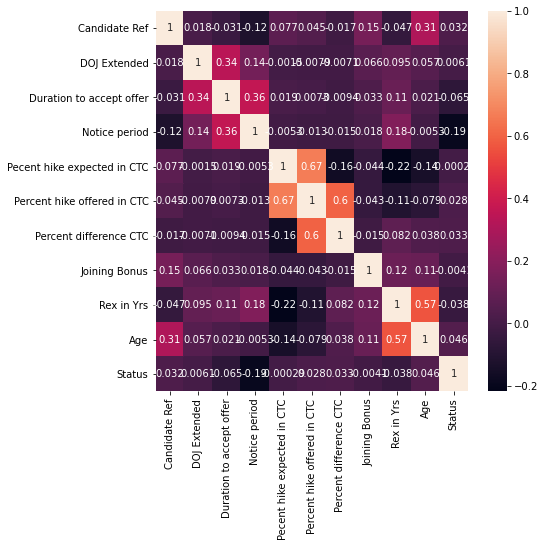

In [19]:
plt.figure(figsize = (7,7))

sns.heatmap(data.corr(), annot = True)

# Machine learning algorithms and compare different models.

- Best fit machine learing algorithm for the best result here can be random forest classification. But since the labels are catagorical varibles, the general logestic resression can also be put to work. 

In [20]:
x_feature = list(data.columns)
x_feature.remove('Status')

In [21]:
x_feature

['Candidate Ref',
 'DOJ Extended',
 'Duration to accept offer',
 'Notice period',
 'Pecent hike expected in CTC',
 'Percent hike offered in CTC',
 'Percent difference CTC',
 'Joining Bonus',
 'Gender',
 'Candidate Source',
 'Rex in Yrs',
 'LOB',
 'Location',
 'Age']

In [22]:
encoded_data = pd.get_dummies(data[x_feature], drop_first = True) 

In [23]:
y = data['Status']
x = encoded_data

In [24]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 42)

#### Applying LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [26]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [28]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train,y_train)

C:\Users\aaron\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.44809337        nan 0.44809337        nan 0.44809337
        nan 0.44809337        nan 0.44809337]
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [29]:
y_pred=clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[   0  498]
 [   0 2201]]
0.8154872174879585
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       498
           1       0.82      1.00      0.90      2201

    accuracy                           0.82      2699
   macro avg       0.41      0.50      0.45      2699
weighted avg       0.67      0.82      0.73      2699



C:\Users\aaron\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### If we observe the model is performing very bad

#### Applying RandomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  59  439]
 [  47 2154]]
0.819933308632827
              precision    recall  f1-score   support

           0       0.56      0.12      0.20       498
           1       0.83      0.98      0.90      2201

    accuracy                           0.82      2699
   macro avg       0.69      0.55      0.55      2699
weighted avg       0.78      0.82      0.77      2699



### RandomForest is also doing bad job so we cant consider this and we do not take a conclusion only based on Accuracy

### We use some techniques to deal with Imbalanced dataset to perform balance

#### 1st Technique:SMOTE (Synthetic Minority Oversampling Technique)
- SMOTE based on nearest neighbour it will create new points.

In [32]:
from imblearn.combine import SMOTETomek

In [36]:
from collections import Counter

In [37]:
os=SMOTETomek(0.9)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The number of classes before fit: {}".format(Counter(y_train)))
print("The number of classes after fit: {}".format(Counter(y_train_ns)))

C:\Users\aaron\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit: Counter({1: 5112, 0: 1184})
The number of classes after fit: Counter({1: 4570, 0: 4058})


In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train_ns,y_train_ns)

RandomForestClassifier()

In [39]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 140  358]
 [ 157 2044]]
0.8091885883660616
              precision    recall  f1-score   support

           0       0.47      0.28      0.35       498
           1       0.85      0.93      0.89      2201

    accuracy                           0.81      2699
   macro avg       0.66      0.60      0.62      2699
weighted avg       0.78      0.81      0.79      2699



#### 4th Technique:Ensemble Technique

In [40]:
from imblearn.ensemble import EasyEnsembleClassifier

In [41]:
easy=EasyEnsembleClassifier()
easy

EasyEnsembleClassifier()

In [42]:
easy.fit(x_train, y_train)
y_pred=easy.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 345  153]
 [ 811 1390]]
0.6428306780288996
              precision    recall  f1-score   support

           0       0.30      0.69      0.42       498
           1       0.90      0.63      0.74      2201

    accuracy                           0.64      2699
   macro avg       0.60      0.66      0.58      2699
weighted avg       0.79      0.64      0.68      2699



In [43]:
# If we Observe the Ensemble Techniques Performed better comparing with Above used techniques